In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('GOOG.csv', date_parser = True)
data.tail()

C:\Users\bhavs\AppData\Local\Temp\ipykernel_17376\930745223.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv('GOOG.csv', date_parser = True)


,Date,Open,High,Low,Close,Adj Close,Volume
3804,2019-09-30,1220.969971,1226.000000,1212.300049,1219.000000,1219.000000,1404100
3805,2019-10-01,1219.000000,1231.229980,1203.579956,1205.099976,1205.099976,1273500
3806,2019-10-02,1196.979980,1196.979980,1171.290039,1176.630005,1176.630005,1615100
3807,2019-10-03,1180.000000,1189.060059,1162.430054,1187.829956,1187.829956,1621200
3808,2019-10-04,1191.890015,1211.439941,1189.170044,1209.000000,1209.000000,1021092


In [3]:
data_training = data[data['Date']<'2019-01-01'].copy()
data_test = data[data['Date']>='2019-01-01'].copy()

In [4]:
data_training = data_training.drop(['Date', 'Adj Close'], axis = 1)


In [5]:
scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)
data_training

array([[3.30294890e-04, 9.44785459e-04, 0.00000000e+00, 1.34908021e-04,
        5.43577404e-01],
       [7.42148227e-04, 2.98909923e-03, 1.88269054e-03, 3.39307537e-03,
        2.77885613e-01],
       [4.71386886e-03, 4.78092896e-03, 5.42828241e-03, 3.83867225e-03,
        2.22150736e-01],
       ...,
       [7.92197108e-01, 8.11970141e-01, 7.90196475e-01, 8.15799920e-01,
        2.54672037e-02],
       [8.18777193e-01, 8.21510648e-01, 8.20249255e-01, 8.10219301e-01,
        1.70463908e-02],
       [8.19874096e-01, 8.19172449e-01, 8.12332341e-01, 8.09012935e-01,
        1.79975186e-02]])

In [6]:
data_training[0:10]


array([[3.30294890e-04, 9.44785459e-04, 0.00000000e+00, 1.34908021e-04,
        5.43577404e-01],
       [7.42148227e-04, 2.98909923e-03, 1.88269054e-03, 3.39307537e-03,
        2.77885613e-01],
       [4.71386886e-03, 4.78092896e-03, 5.42828241e-03, 3.83867225e-03,
        2.22150736e-01],
       [4.91367646e-03, 4.01532941e-03, 3.15578542e-03, 1.98678849e-03,
        1.85522018e-01],
       [2.35285614e-03, 2.54928676e-03, 3.28434064e-03, 2.44873974e-03,
        1.11762967e-01],
       [2.34877785e-03, 2.52892558e-03, 3.60779701e-03, 3.22955376e-03,
        8.62763771e-02],
       [3.63326671e-03, 2.80177162e-03, 4.03492722e-03, 2.51005881e-03,
        7.55243925e-02],
       [2.48334262e-03, 1.52712947e-03, 2.50886935e-03, 8.17608079e-04,
        6.31682127e-02],
       [1.26817570e-03, 8.02253103e-04, 2.57107531e-03, 9.64778600e-04,
        5.97732318e-02],
       [1.43128522e-03, 5.00900100e-04, 1.53849690e-03, 9.81131336e-05,
        1.11151095e-01]])

In [7]:
X_train = []
y_train = []

In [8]:
for i in range(60, data_training.shape[0]):
    X_train.append(data_training[i-60:i])
    y_train.append(data_training[i, 0])

In [9]:
X_train, y_train = np.array(X_train), np.array(y_train)


In [10]:
X_train.shape


(3557, 60, 5)

In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [12]:
regressior = Sequential()

regressior.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 120, activation = 'relu'))
regressior.add(Dropout(0.2))

regressior.add(Dense(units = 1))

In [13]:
regressior.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 60)            15840     
                                                                 
 dropout (Dropout)           (None, 60, 60)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 60)            29040     
                                                                 
 dropout_1 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_2 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [14]:
regressior.compile(optimizer='adam', loss = 'mean_squared_error')


In [15]:
regressior.fit(X_train, y_train, epochs=50, batch_size=32)


Epoch 1/50
112/112 [==============================] - 16s 103ms/step - loss: 0.0138
Epoch 2/50
112/112 [==============================] - 11s 101ms/step - loss: 0.0026
Epoch 3/50
112/112 [==============================] - 13s 116ms/step - loss: 0.0019
Epoch 4/50
112/112 [==============================] - 12s 109ms/step - loss: 0.0019
Epoch 5/50
112/112 [==============================] - 12s 104ms/step - loss: 0.0018
Epoch 6/50
112/112 [==============================] - 13s 112ms/step - loss: 0.0016
Epoch 7/50
112/112 [==============================] - 14s 129ms/step - loss: 0.0015
Epoch 8/50
112/112 [==============================] - 13s 114ms/step - loss: 0.0014
Epoch 9/50
112/112 [==============================] - 13s 114ms/step - loss: 0.0014
Epoch 10/50
112/112 [==============================] - 12s 106ms/step - loss: 0.0014
Epoch 11/50
112/112 [==============================] - 12s 107ms/step - loss: 0.0012
Epoch 12/50
112/112 [==============================] - 13s 113ms/step - lo

In [26]:
print(data_test.head())

data_training = data_test.drop(['Date', 'Adj Close'], axis = 1)

data_training = pd.DataFrame(data_test, columns =['Open', 'High', 'Low','Close','Volume'])

            Date         Open         High          Low        Close  \
3617  2019-01-02  1016.570007  1052.319946  1015.710022  1045.849976   
3618  2019-01-03  1041.000000  1056.979980  1014.070007  1016.059998   
3619  2019-01-04  1032.589966  1070.839966  1027.417969  1070.709961   
3620  2019-01-07  1071.500000  1074.000000  1054.760010  1068.390015   
3621  2019-01-08  1076.109985  1084.560059  1060.530029  1076.280029   

        Adj Close   Volume  
3617  1045.849976  1532600  
3618  1016.059998  1841100  
3619  1070.709961  2093900  
3620  1068.390015  1981900  
3621  1076.280029  1764900  


In [17]:
#data_training.tail(60)
#data_train

data_training.tail(60)

,Open,High,Low,Close,Volume
3749,1143.989990,1147.339966,1138.780029,1144.900024,864000
3750,1146.859985,1150.819946,1139.400024,1150.339966,903800
3751,1146.000000,1158.579956,1145.000000,1153.579956,1238800
3752,1150.969971,1158.359985,1145.770020,1146.349976,1170000
3753,1141.739990,1147.604980,1132.729980,1146.329956,1291300
3754,1148.189941,1151.140015,1129.619995,1130.099976,1647200
3755,1133.449951,1139.250000,1124.239990,1138.069946,1301500
3756,1144.000000,1146.900024,1131.800049,1146.209961,1093700
3757,1131.900024,1144.000000,1126.989990,1137.810059,1589800
3758,1137.819946,1141.699951,1120.920044,1132.119995,2209800


In [23]:
past_60_days = data_training.tail(60)
past_60_days


,Open,High,Low,Close,Volume
3749,1143.989990,1147.339966,1138.780029,1144.900024,864000
3750,1146.859985,1150.819946,1139.400024,1150.339966,903800
3751,1146.000000,1158.579956,1145.000000,1153.579956,1238800
3752,1150.969971,1158.359985,1145.770020,1146.349976,1170000
3753,1141.739990,1147.604980,1132.729980,1146.329956,1291300
3754,1148.189941,1151.140015,1129.619995,1130.099976,1647200
3755,1133.449951,1139.250000,1124.239990,1138.069946,1301500
3756,1144.000000,1146.900024,1131.800049,1146.209961,1093700
3757,1131.900024,1144.000000,1126.989990,1137.810059,1589800
3758,1137.819946,1141.699951,1120.920044,1132.119995,2209800


In [29]:
if isinstance(past_60_days, pd.DataFrame):
    print("past_60_days is a DataFrame")
else:
    print("past_60_days is not a DataFrame")


past_60_days is a DataFrame


In [32]:
df = pd.concat([past_60_days, data_test], ignore_index=True)

In [33]:
df = df.drop(['Date', 'Adj Close'], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,1143.989990,1147.339966,1138.780029,1144.900024,864000
1,1146.859985,1150.819946,1139.400024,1150.339966,903800
2,1146.000000,1158.579956,1145.000000,1153.579956,1238800
3,1150.969971,1158.359985,1145.770020,1146.349976,1170000
4,1141.739990,1147.604980,1132.729980,1146.329956,1291300


In [34]:
#inputs = scaler.transform(df)
#inputs=df.to_numpy()
#inputs



inputs = scaler.transform(df)
inputs

array([[0.89602895, 0.89654266, 0.90822658, 0.89870435, 0.01037275],
       [0.89837835, 0.89938762, 0.90874272, 0.90316877, 0.01085497],
       [0.89767436, 0.90573159, 0.91340463, 0.90582774, 0.01491393],
       ...,
       [0.93940683, 0.93712442, 0.93529076, 0.9247443 , 0.01947328],
       [0.92550693, 0.93064972, 0.92791493, 0.9339358 , 0.01954719],
       [0.93524016, 0.94894575, 0.95017564, 0.95130949, 0.01227612]])

In [35]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])

In [36]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((192, 60, 5), (192,))

In [37]:
y_pred = regressior.predict(X_test)


6/6 [==============================] - 1s 24ms/step


In [38]:
scaler.scale_


array([8.18605127e-04, 8.17521128e-04, 8.32487534e-04, 8.20673293e-04,
       1.21162775e-08])

In [39]:
scale = 1/8.18605127e-04
scale

1221.5901990069017

In [40]:
y_pred = y_pred*scale
y_test = y_test*scale



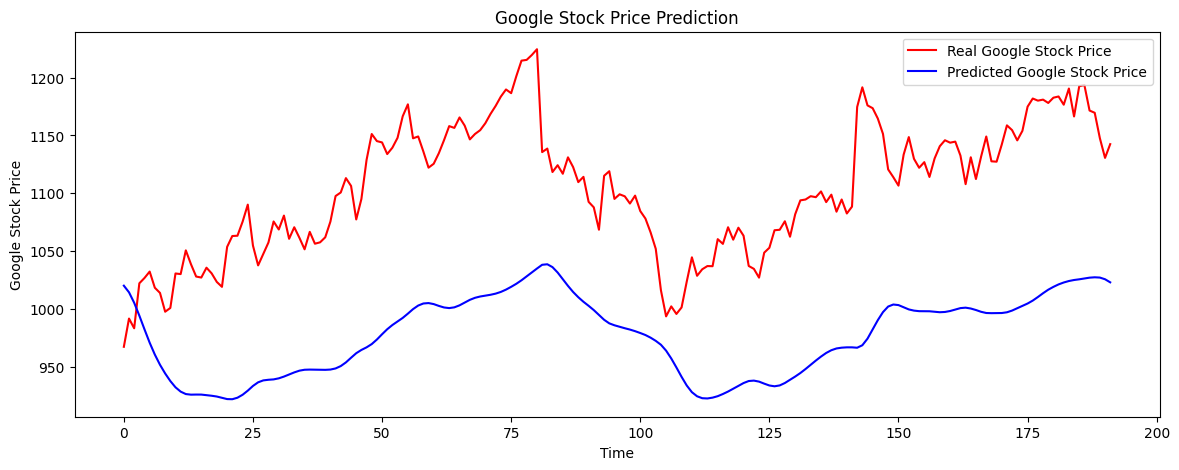

In [41]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()